In [19]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
sn.set(font_scale=2)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
import gmaps
import gmaps.datasets
from ipywidgets.embed import embed_minimal_html
from sklearn.metrics import mean_absolute_error
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def statistics(path):
    waiting = []
    transfers = []
    duration = []

    for i in range(1, 11):
        filepath = path + str(i) + ".csv"
        df = pd.read_csv(filepath)
        waiting_list = df['waiting_time'].tolist()
        transfer_list = df['transfers'].tolist()
        duration_list = df['duration'].tolist()
        waiting += waiting_list
        transfers += transfer_list
        duration += duration_list

    waiting_round = [round(x) for x in waiting]
    transfers_round = [round(x) for x in transfers]
    duration_round = [round(x) for x in duration]

    return waiting_round, transfers_round, duration_round

In [3]:
waiting1, transfers1, duration1 = statistics("../../Results/Sc1Weekend/20/passengers_h20_sc1week_i")
waiting2, transfers2, duration2 = statistics("../../Results/Sc2Weekend/20/passengers_h20_sc2week_i")
waiting3, transfers3, duration3 = statistics("../../Results/Sc1Week/20/passengers_h20_sc1week_i")
waiting4, transfers4, duration4 = statistics("../../Results/Sc2Week/20/passengers_h20_sc2week_i")

In [12]:
transfers1 = Counter(transfers1)
transfers2 = Counter(transfers2)
transfers3 = Counter(transfers3)
transfers4 = Counter(transfers4)
transfers4

Counter({1: 29286, 0: 25899, 2: 6995})

In [13]:
df1 = pd.DataFrame({'Transfers': [0, 1, 2], 'Scenario': 'Scenario 1', 
                    'Day': 'Weekends', 'Count': [29734, 33403, 8533]})
df2 = pd.DataFrame({'Transfers': [0, 1, 2], 'Scenario': 'Scenario 2', 
                    'Day': 'Weekends', 'Count': [29897, 33479, 8294]})
df3 = pd.DataFrame({'Transfers': [0, 1, 2], 'Scenario': 'Scenario 1', 
                    'Day': 'Weekdays', 'Count': [25910, 29125, 7145]})
df4 = pd.DataFrame({'Transfers': [0, 1, 2], 'Scenario': 'Scenario 2', 
                    'Day': 'Weekdays', 'Count': [29286, 25899, 6995]})

In [14]:
dfboxplot = pd.concat([df1, df2, df3, df4])
dfboxplot

,Transfers,Scenario,Day,Count
0,0,Scenario 1,Weekends,29734
1,1,Scenario 1,Weekends,33403
2,2,Scenario 1,Weekends,8533
0,0,Scenario 2,Weekends,29897
1,1,Scenario 2,Weekends,33479
2,2,Scenario 2,Weekends,8294
0,0,Scenario 1,Weekdays,25910
1,1,Scenario 1,Weekdays,29125
2,2,Scenario 1,Weekdays,7145
0,0,Scenario 2,Weekdays,29286


[Text(0,0,'Scenario 1'), Text(0,0,'Scenario 2')]

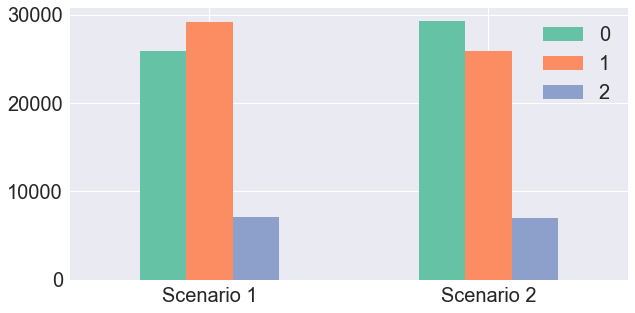

In [25]:
index = ["Scenario 1", "Scenario 2"]

df = pd.DataFrame({'0': [25910, 29286],
                  '1': [29125, 25899],
                  '2': [7145, 6995]}, index=index)

plot = df.plot.bar(figsize = [10,5], colors = sn.color_palette("Set2", 7), width = 0.5)
plot.set_xticklabels(index, rotation=0)